<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/SEMHAS_DAYU_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL ORANG NORMAL (mg/ml)

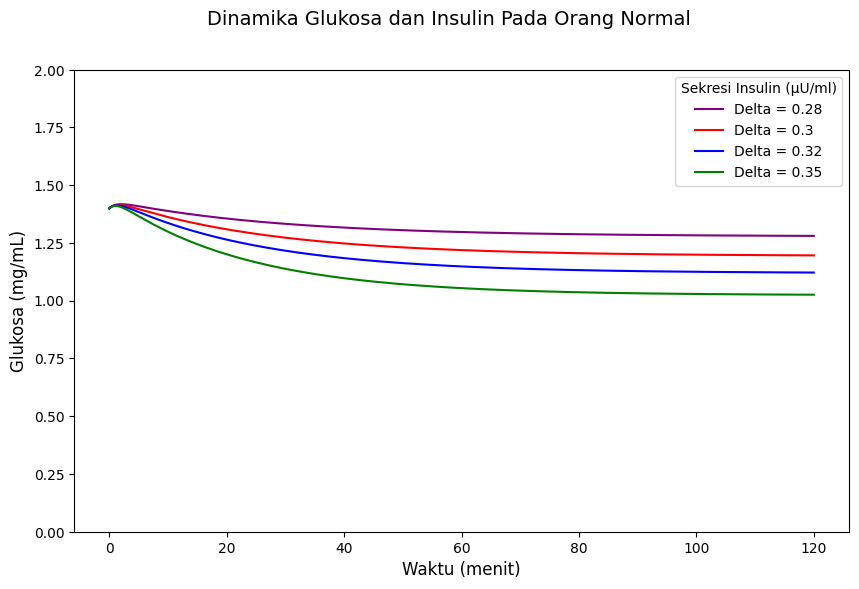

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.28, 0.3, 0.32, 0.35 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [140.0, 20.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

In [6]:
print("Perhitungan Titik Kesetimbangan dan Nilai Eigen untuk tiap Delta:")
print("-" * 60)
print(f"{'Delta':>6} | {'G_eq':>10} | {'I_eq':>10} | {'Lambda_1':>10} | {'Lambda_2':>10}")
print("-" * 60)

for i, delta in enumerate(delta_list):
    # Hitung titik kesetimbangan
    denom = beta * gamma + delta * theta
    G_eq = (alpha * beta) / denom
    I_eq = delta / beta

    # Hitung nilai eigen
    lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
    lambda_2 = -(alpha * beta**2) / denom

    print(f"{delta:6.2f} | {G_eq:10.2f} | {I_eq:10.2f} | {lambda_1:10.4f} | {lambda_2:10.4f}")


Perhitungan Titik Kesetimbangan dan Nilai Eigen untuk tiap Delta:
------------------------------------------------------------
 Delta |       G_eq |       I_eq |   Lambda_1 |   Lambda_2
------------------------------------------------------------
  0.30 |     117.93 |      50.00 |    -0.0382 |    -0.7076
  0.32 |     110.59 |      53.33 |    -0.0407 |    -0.6636
  0.34 |     104.12 |      56.67 |    -0.0432 |    -0.6247
  0.36 |      98.36 |      60.00 |    -0.0458 |    -0.5901


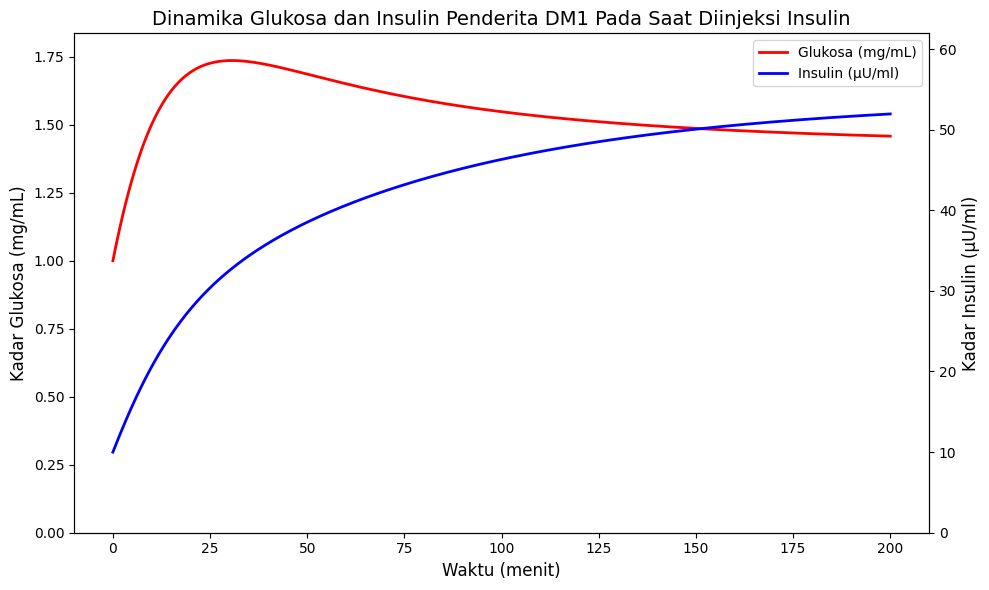

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 13
gamma = 0.05
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([100.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0] / 100
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 0.1)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()


In [14]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 142.91296103858954
I (Insulin) = 53.958110230327144
Nilai Lambda 1 (λ₁): -0.05950781735083253
Nilai Lambda 2 (λ₂): -0.05950873608387295


## Model mg/dl

Model Normal

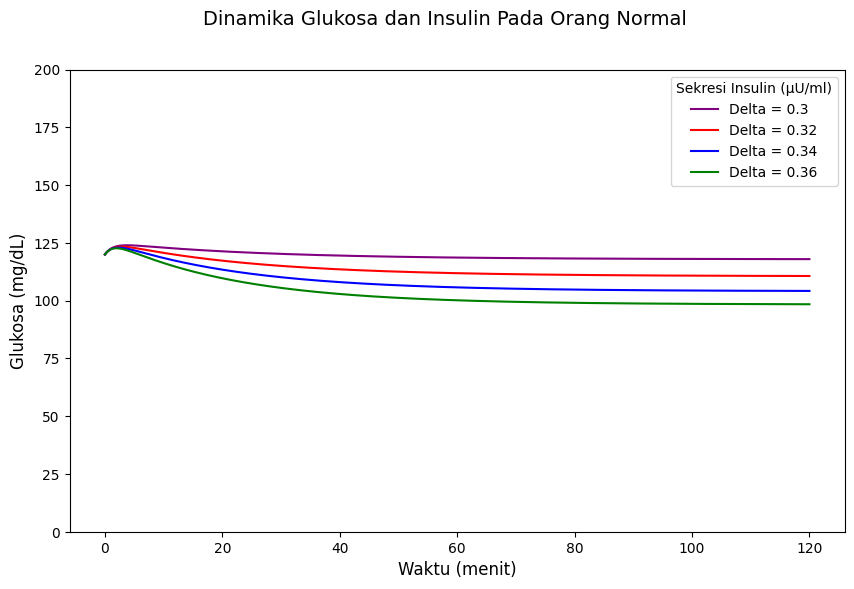

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075919
beta = 0.006

# Rentang waktu simulasi
t = np.linspace(0, 120, 3000)

# Variasi delta yang ingin diuji
delta_list = [0.3, 0.32, 0.34, 0.36 ]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [120.0, 10.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0]  # Tidak dibagi, tetap dalam mg/dL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/dL)', color='black', fontsize=12)
ax1.set_ylim(0, 200)  # Disesuaikan karena dalam mg/dL
ax1.legend(loc="upper right", title="Sekresi Insulin (μU/ml)", fontsize=10)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

Model tk1

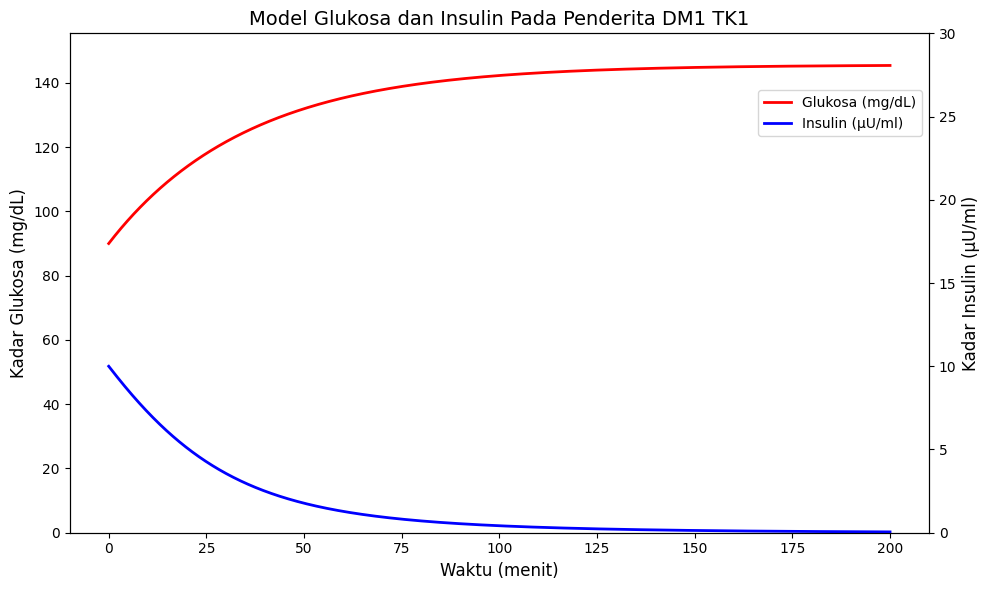

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 4.5
gamma = 0.0309
theta = 0.00016089
sigma = 0.04
beta = 0.0004
epsilon = 0.6

t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0]
insulin = solution[:, 1]


fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/dL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (mg/dL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 10)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 20)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10, bbox_to_anchor=(1.0, 0.9))

plt.title('Model Glukosa dan Insulin Pada Penderita DM1 TK1', fontsize=14)
plt.tight_layout()
plt.show()

MODEL TK2 INJEKSI mg/dl

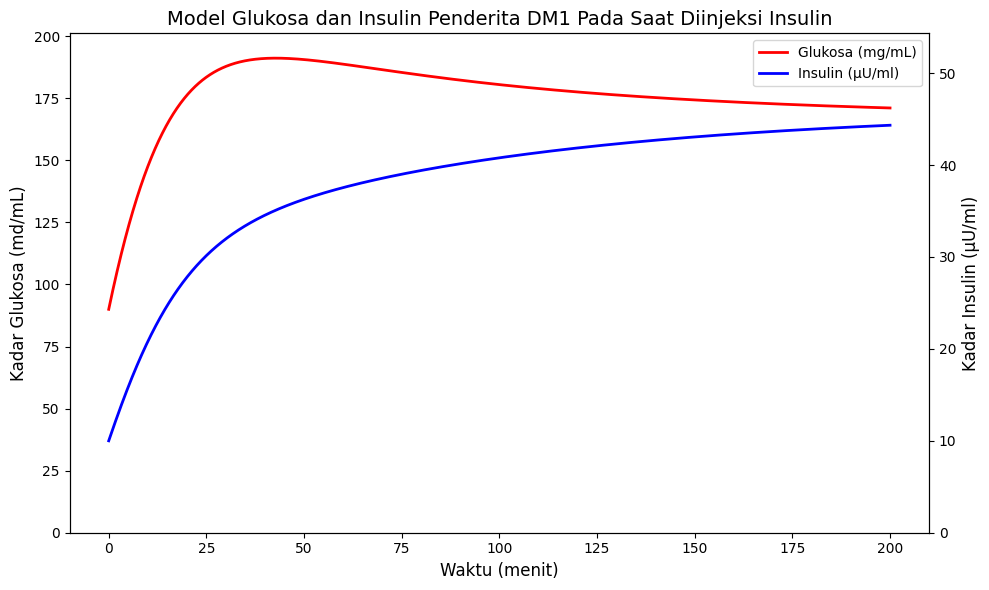

In [ ]:
# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter
alpha = 11
gamma = 0.0309
theta = 0.00075919
sigma = 1.54
beta = 0.0002
epsilon = 0.98

t = np.linspace(0, 200, 3000)
z0 = np.array([90.0, 10.0])
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

glucose = solution[:, 0]
insulin = solution[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(t, glucose, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Kadar Glukosa (md/mL)', fontsize=12)
ax1.set_ylim(0, max(glucose) + 10)

ax2 = ax1.twinx()
line2, = ax2.plot(t, insulin, label='Insulin (μU/ml)', color='blue', linewidth=2)
ax2.set_ylabel('Kadar Insulin (μU/ml)', fontsize=12)
ax2.set_ylim(0, max(insulin) + 10)

# Legend tanpa title
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right", fontsize=10)

plt.title('Model Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 167.13304052019438
I (Insulin) = 45.99089991015835
Nilai Lambda 1 (λ₁): -0.049258347008976154
Nilai Lambda 2 (λ₂): -0.049258548158024044
